# Capstone Project : Accident Severity

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

path='https://opendata.arcgis.com/datasets/5b5c745e0f1f48e7a53acec63a0022ab_0.csv'
df = pd.read_csv(path)
df.head()

,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,LOCATION,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,-122.356511,47.517361,1,327920,329420,3856094,Matched,Intersection,34911.0,17TH AVE SW AND SW ROXBURY ST,...,Dry,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,-122.361405,47.702064,2,46200,46200,1791736,Matched,Block,NaN,HOLMAN RD NW BETWEEN 4TH AVE NW AND 3RD AVE NW,...,Wet,Dusk,NaN,5101020.0,NaN,13,From same direction - both going straight - bo...,0,0,N
2,-122.317414,47.664028,3,1212,1212,3507861,Matched,Block,NaN,ROOSEVELT WAY NE BETWEEN NE 47TH ST AND NE 50T...,...,Dry,Dark - Street Lights On,NaN,NaN,NaN,30,From opposite direction - all others,0,0,N
3,-122.318234,47.619927,4,327909,329409,EA03026,Matched,Intersection,29054.0,11TH AVE E AND E JOHN ST,...,Wet,Dark - Street Lights On,NaN,NaN,NaN,0,Vehicle going straight hits pedestrian,0,0,N
4,-122.351724,47.560306,5,104900,104900,2671936,Matched,Block,NaN,WEST MARGINAL WAY SW BETWEEN SW ALASKA ST AND ...,...,Ice,Dark - Street Lights On,NaN,9359012.0,Y,50,Fixed object,0,0,N


<div id="data_wrangling">
    <h2>Data Wrangling</h2>
</div>


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221738 entries, 0 to 221737
Data columns (total 40 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   X                214260 non-null  float64
 1   Y                214260 non-null  float64
 2   OBJECTID         221738 non-null  int64  
 3   INCKEY           221738 non-null  int64  
 4   COLDETKEY        221738 non-null  int64  
 5   REPORTNO         221738 non-null  object 
 6   STATUS           221738 non-null  object 
 7   ADDRTYPE         218024 non-null  object 
 8   INTKEY           72027 non-null   float64
 9   LOCATION         217145 non-null  object 
 10  EXCEPTRSNCODE    101335 non-null  object 
 11  EXCEPTRSNDESC    11785 non-null   object 
 12  SEVERITYCODE     221737 non-null  object 
 13  SEVERITYDESC     221738 non-null  object 
 14  COLLISIONTYPE    195287 non-null  object 
 15  PERSONCOUNT      221738 non-null  int64  
 16  PEDCOUNT         221738 non-null  int6

In [3]:
df['SEVERITYCODE'].value_counts()

1     137776
2      58842
0      21656
2b      3111
3        352
Name: SEVERITYCODE, dtype: int64

In [4]:
df['SEVERITYDESC'].value_counts()


Property Damage Only Collision    137776
Injury Collision                   58842
Unknown                            21657
Serious Injury Collision            3111
Fatality Collision                   352
Name: SEVERITYDESC, dtype: int64

In [5]:
df.describe()

,X,Y,OBJECTID,INCKEY,COLDETKEY,INTKEY,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,SDOT_COLCODE,SDOTCOLNUM,SEGLANEKEY,CROSSWALKKEY
count,214260.000000,214260.000000,221738.000000,221738.000000,221738.000000,72027.000000,221738.000000,221738.000000,221738.000000,221738.000000,221738.000000,221738.000000,221738.000000,221737.000000,1.272050e+05,221738.000000,2.217380e+05
mean,-122.330753,47.620191,110869.500000,145006.735517,145236.969811,37636.986713,2.226741,0.038095,0.027352,1.729442,0.373964,0.015203,0.001700,13.383305,7.971063e+06,262.624791,9.568044e+03
std,0.030058,0.056059,64010.391332,89372.351774,89749.554004,52000.820955,1.469699,0.201704,0.164512,0.830529,0.732050,0.158004,0.044967,7.298289,2.611523e+06,3252.882590,7.142784e+04
min,-122.419091,47.495573,1.000000,1001.000000,1001.000000,23807.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.007024e+06,0.000000,0.000000e+00
25%,-122.349280,47.577106,55435.250000,71721.250000,71721.250000,28653.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,11.000000,6.007029e+06,0.000000,0.000000e+00
50%,-122.330363,47.616033,110869.500000,127358.500000,127358.500000,29973.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,11.000000,8.033011e+06,0.000000,0.000000e+00
75%,-122.311998,47.664290,166303.750000,210118.750000,210338.750000,33984.000000,3.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,14.000000,1.018101e+07,0.000000,0.000000e+00
max,-122.238949,47.734142,221738.000000,334276.000000,335776.000000,764413.000000,93.000000,6.000000,2.000000,15.000000,78.000000,41.000000,5.000000,87.000000,1.307202e+07,525241.000000,5.239700e+06


In [6]:
print(df.shape)

(221738, 40)


In [7]:
df['SEVERITYCODE'].replace("2b", 
           "4", 
           inplace=True)
df['SEVERITYCODE'].value_counts()

1    137776
2     58842
0     21656
4      3111
3       352
Name: SEVERITYCODE, dtype: int64

In [8]:
df["SEVERITYCODE"] = pd.to_numeric(df["SEVERITYCODE"])
df['SEVERITYCODE'].value_counts()

1.0    137776
2.0     58842
0.0     21656
4.0      3111
3.0       352
Name: SEVERITYCODE, dtype: int64

array([[<AxesSubplot:title={'center':'SEVERITYCODE'}>]], dtype=object)

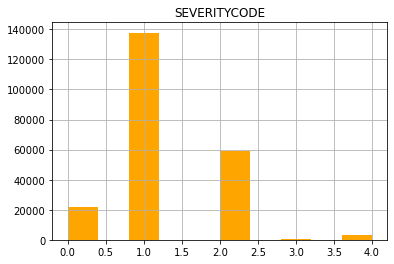

In [9]:
df.hist(column='SEVERITYCODE', color = "orange")

In [10]:
from sklearn.utils import resample

df_maj = df[df.SEVERITYCODE==1]
df_min = df[df.SEVERITYCODE!=1]

df_dsample = resample(df_maj,
                      replace=False,
                      n_samples= 65000,
                      random_state=123)

balanced_df = pd.concat([df_dsample, df_min])

balanced_df['SEVERITYCODE'].value_counts()

1.0    65000
2.0    58842
0.0    21656
4.0     3111
3.0      352
Name: SEVERITYCODE, dtype: int64

In [11]:
balanced_df[['X','Y','SEVERITYCODE','SEVERITYDESC','COLLISIONTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','INJURIES','SERIOUSINJURIES','FATALITIES','JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND','SPEEDING']].head(10)

,X,Y,SEVERITYCODE,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
140443,-122.328225,47.529262,1.0,Property Damage Only Collision,Right Turn,2,0,0,2,0,0,0,Mid-Block (not related to intersection),Overcast,Wet,Dawn,NaN
146269,-122.353427,47.646887,1.0,Property Damage Only Collision,Parked Car,2,0,0,2,0,0,0,At Intersection (intersection related),Unknown,Unknown,Unknown,NaN
122846,-122.356715,47.623929,1.0,Property Damage Only Collision,Parked Car,2,0,0,2,0,0,0,Mid-Block (not related to intersection),Clear,Dry,Daylight,NaN
200391,-122.335094,47.708169,1.0,Property Damage Only Collision,Sideswipe,3,0,0,2,0,0,0,Mid-Block (not related to intersection),Clear,Dry,Daylight,NaN
9379,-122.314301,47.547709,1.0,Property Damage Only Collision,Other,1,0,0,1,0,0,0,Mid-Block (not related to intersection),Raining,Wet,Daylight,NaN
119711,-122.338693,47.652335,1.0,Property Damage Only Collision,Parked Car,2,0,0,2,0,0,0,NaN,Unknown,Unknown,Unknown,NaN
76534,-122.323754,47.598350,1.0,Property Damage Only Collision,Angles,2,0,0,2,0,0,0,At Intersection (intersection related),Clear,Dry,Daylight,NaN
214363,-122.335036,47.697772,1.0,Property Damage Only Collision,Angles,3,0,0,2,0,0,0,At Intersection (intersection related),Overcast,Wet,Daylight,NaN
215118,-122.334198,47.585043,1.0,Property Damage Only Collision,Sideswipe,2,0,0,2,0,0,0,Mid-Block (not related to intersection),Overcast,Dry,Daylight,NaN
41613,-122.320603,47.710395,1.0,Property Damage Only Collision,Other,2,0,0,2,0,0,0,Mid-Block (not related to intersection),Clear,Dry,Daylight,NaN


In [12]:
df_car = balanced_df[['SEVERITYCODE','COLLISIONTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','INJURIES','SERIOUSINJURIES','FATALITIES','JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND','SPEEDING']]
df_car.head(20)

,SEVERITYCODE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INJURIES,SERIOUSINJURIES,FATALITIES,JUNCTIONTYPE,WEATHER,ROADCOND,LIGHTCOND,SPEEDING
140443,1.0,Right Turn,2,0,0,2,0,0,0,Mid-Block (not related to intersection),Overcast,Wet,Dawn,NaN
146269,1.0,Parked Car,2,0,0,2,0,0,0,At Intersection (intersection related),Unknown,Unknown,Unknown,NaN
122846,1.0,Parked Car,2,0,0,2,0,0,0,Mid-Block (not related to intersection),Clear,Dry,Daylight,NaN
200391,1.0,Sideswipe,3,0,0,2,0,0,0,Mid-Block (not related to intersection),Clear,Dry,Daylight,NaN
9379,1.0,Other,1,0,0,1,0,0,0,Mid-Block (not related to intersection),Raining,Wet,Daylight,NaN
119711,1.0,Parked Car,2,0,0,2,0,0,0,NaN,Unknown,Unknown,Unknown,NaN
76534,1.0,Angles,2,0,0,2,0,0,0,At Intersection (intersection related),Clear,Dry,Daylight,NaN
214363,1.0,Angles,3,0,0,2,0,0,0,At Intersection (intersection related),Overcast,Wet,Daylight,NaN
215118,1.0,Sideswipe,2,0,0,2,0,0,0,Mid-Block (not related to intersection),Overcast,Dry,Daylight,NaN
41613,1.0,Other,2,0,0,2,0,0,0,Mid-Block (not related to intersection),Clear,Dry,Daylight,NaN


In [13]:
missing_data = df_car.isnull()
missing_data.head(5)

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

SEVERITYCODE
False    148961
True          1
Name: SEVERITYCODE, dtype: int64

COLLISIONTYPE
False    124531
True      24431
Name: COLLISIONTYPE, dtype: int64

PERSONCOUNT
False    148962
Name: PERSONCOUNT, dtype: int64

PEDCOUNT
False    148962
Name: PEDCOUNT, dtype: int64

PEDCYLCOUNT
False    148962
Name: PEDCYLCOUNT, dtype: int64

VEHCOUNT
False    148962
Name: VEHCOUNT, dtype: int64

INJURIES
False    148962
Name: INJURIES, dtype: int64

SERIOUSINJURIES
False    148962
Name: SERIOUSINJURIES, dtype: int64

FATALITIES
False    148962
Name: FATALITIES, dtype: int64

JUNCTIONTYPE
False    140135
True       8827
Name: JUNCTIONTYPE, dtype: int64

WEATHER
False    124413
True      24549
Name: WEATHER, dtype: int64

ROADCOND
False    124473
True      24489
Name: ROADCOND, dtype: int64

LIGHTCOND
False    124372
True      24590
Name: LIGHTCOND, dtype: int64

SPEEDING
True     142060
False      6902
Name: SPEEDING, dtype: int64



In [14]:
df_car['WEATHER'].value_counts()

Clear                       74375
Raining                     22413
Overcast                    18489
Unknown                      7628
Snowing                       541
Other                         470
Fog/Smog/Smoke                374
Sleet/Hail/Freezing Rain       64
Blowing Sand/Dirt              37
Severe Crosswind               14
Partly Cloudy                   7
Blowing Snow                    1
Name: WEATHER, dtype: int64

In [15]:
df_car['ROADCOND'].value_counts()

Dry               83334
Wet               31983
Unknown            7579
Ice                 755
Snow/Slush          584
Other                81
Standing Water       72
Sand/Mud/Dirt        44
Oil                  41
Name: ROADCOND, dtype: int64

In [16]:
df_car['LIGHTCOND'].value_counts()

Daylight                    77920
Dark - Street Lights On     32090
Unknown                      6805
Dusk                         3964
Dawn                         1718
Dark - No Street Lights       951
Dark - Street Lights Off      764
Other                         142
Dark - Unknown Lighting        18
Name: LIGHTCOND, dtype: int64

In [17]:
df_car['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              64154
At Intersection (intersection related)               50311
Mid-Block (but intersection related)                 16294
Driveway Junction                                     7493
At Intersection (but not related to intersection)     1739
Ramp Junction                                          127
Unknown                                                 17
Name: JUNCTIONTYPE, dtype: int64

In [18]:
df_car['COLLISIONTYPE'].value_counts()

Parked Car    24465
Angles        24383
Rear Ended    24293
Other         15290
Sideswipe     10258
Left Turn      9658
Pedestrian     7318
Cycles         5572
Right Turn     1746
Head On        1548
Name: COLLISIONTYPE, dtype: int64

In [19]:
df_car['SPEEDING'].value_counts()

Y    6902
Name: SPEEDING, dtype: int64

In [20]:
import numpy as np

df_car["COLLISIONTYPE"].replace(np.nan, "Unknown", inplace=True)
df_car["JUNCTIONTYPE"].replace(np.nan, "Unknown", inplace=True)
df_car["LIGHTCOND"].replace(np.nan, "Unknown", inplace=True)
df_car["ROADCOND"].replace(np.nan, "Unknown", inplace=True)
df_car["WEATHER"].replace(np.nan, "Unknown", inplace=True)
df_car["SPEEDING"].replace(np.nan, "N", inplace=True)

df_car["SEVERITYCODE"].replace(np.nan, 0, inplace=True)

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/pandas/core/series.py:4569: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [21]:
df_car['SPEEDING'].value_counts()

N    142060
Y      6902
Name: SPEEDING, dtype: int64

In [22]:
df_car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 148962 entries, 140443 to 221737
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   SEVERITYCODE     148962 non-null  float64
 1   COLLISIONTYPE    148962 non-null  object 
 2   PERSONCOUNT      148962 non-null  int64  
 3   PEDCOUNT         148962 non-null  int64  
 4   PEDCYLCOUNT      148962 non-null  int64  
 5   VEHCOUNT         148962 non-null  int64  
 6   INJURIES         148962 non-null  int64  
 7   SERIOUSINJURIES  148962 non-null  int64  
 8   FATALITIES       148962 non-null  int64  
 9   JUNCTIONTYPE     148962 non-null  object 
 10  WEATHER          148962 non-null  object 
 11  ROADCOND         148962 non-null  object 
 12  LIGHTCOND        148962 non-null  object 
 13  SPEEDING         148962 non-null  object 
dtypes: float64(1), int64(7), object(6)
memory usage: 17.0+ MB


<div id="exploratory_analysis">
    <h2>Exploratory Data Analysis</h2>
</div>


<Figure size 2520x360 with 0 Axes>

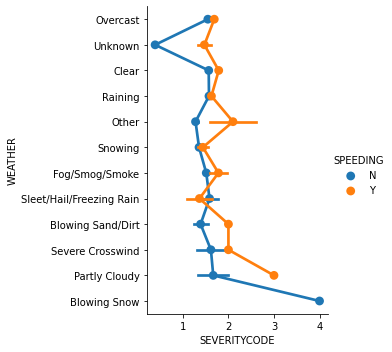

In [23]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

plt.figure(figsize=(35,5))
sns.catplot(x="SEVERITYCODE", y="WEATHER", hue="SPEEDING", kind="point", data=df_car)



<Figure size 2520x360 with 0 Axes>

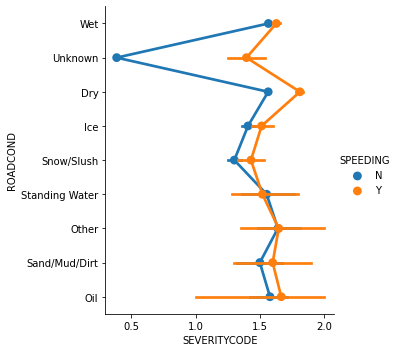

In [24]:
plt.figure(figsize=(35,5))
sns.catplot(x="SEVERITYCODE", y="ROADCOND", hue="SPEEDING", kind="point", data=df_car)

<Figure size 2520x360 with 0 Axes>

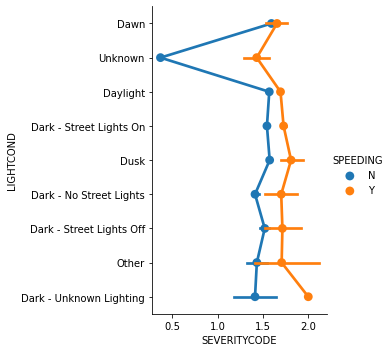

In [25]:
plt.figure(figsize=(35,5))
sns.catplot(x="SEVERITYCODE", y="LIGHTCOND", hue="SPEEDING", kind="point", data=df_car)

<Figure size 2520x360 with 0 Axes>

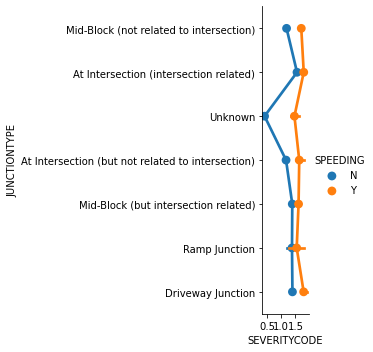

In [26]:
plt.figure(figsize=(35,5))
sns.catplot(x="SEVERITYCODE", y="JUNCTIONTYPE", hue="SPEEDING", kind="point", data=df_car)

<div id="data_preprocessing">
    <h2>Data Pre-processing</h2>
</div>


In [27]:
X = df_car[['COLLISIONTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','INJURIES','SERIOUSINJURIES','FATALITIES','JUNCTIONTYPE','WEATHER','ROADCOND','LIGHTCOND','SPEEDING']].values
X[0:5]




array([['Right Turn', 2, 0, 0, 2, 0, 0, 0,
        'Mid-Block (not related to intersection)', 'Overcast', 'Wet',
        'Dawn', 'N'],
       ['Parked Car', 2, 0, 0, 2, 0, 0, 0,
        'At Intersection (intersection related)', 'Unknown', 'Unknown',
        'Unknown', 'N'],
       ['Parked Car', 2, 0, 0, 2, 0, 0, 0,
        'Mid-Block (not related to intersection)', 'Clear', 'Dry',
        'Daylight', 'N'],
       ['Sideswipe', 3, 0, 0, 2, 0, 0, 0,
        'Mid-Block (not related to intersection)', 'Clear', 'Dry',
        'Daylight', 'N'],
       ['Other', 1, 0, 0, 1, 0, 0, 0,
        'Mid-Block (not related to intersection)', 'Raining', 'Wet',
        'Daylight', 'N']], dtype=object)

In [28]:
from sklearn import preprocessing
le_Col = preprocessing.LabelEncoder()
le_Col.fit(['Angles','Rear Ended','Parked Car', 'Other', 'Sideswipe', 'Left Turn', 'Pedestrian', 'Cycles', 'Right Turn', 'Head On', 'Unknown'])
X[:,0] = le_Col.transform(X[:,0]) 


le_Jun = preprocessing.LabelEncoder()
le_Jun.fit([ 'Mid-Block (not related to intersection)', 'At Intersection (intersection related)', 'Mid-Block (but intersection related)','Driveway Junction','At Intersection (but not related to intersection)','Ramp Junction','Unknown'])
X[:,8] = le_Jun.transform(X[:,8])


le_Wthr = preprocessing.LabelEncoder()
le_Wthr.fit([ 'Clear', 'Raining', 'Overcast', 'Unknown', 'Snowing', 'Other', 'Fog/Smog/Smoke', 'Sleet/Hail/Freezing Rain', 'Blowing Sand/Dirt', 'Severe Crosswind', 'Partly Cloudy', 'Blowing Snow'])
X[:,9] = le_Wthr.transform(X[:,9]) 

le_Rcnd = preprocessing.LabelEncoder()
le_Rcnd.fit([ 'Dry', 'Wet', 'Unknown', 'Ice', 'Snow/Slush', 'Other', 'Standing Water', 'Sand/Mud/Dirt', 'Oil'])
X[:,10] = le_Rcnd.transform(X[:,10]) 

le_Lcnd = preprocessing.LabelEncoder()
le_Lcnd.fit([ 'Daylight', 'Dark - Street Lights On', 'Unknown', 'Dusk', 'Snow/Slush', 'Dawn', 'Dark - No Street Lights', 'Dark - Street Lights Off', 'Other', 'Dark - Unknown Lighting'])
X[:,11] = le_Lcnd.transform(X[:,11]) 

le_Spd = preprocessing.LabelEncoder()
le_Spd.fit([ 'Y', 'N'])
X[:,12] = le_Spd.transform(X[:,12]) 

X[0:5]

array([[8, 2, 0, 0, 2, 0, 0, 0, 4, 5, 8, 4, 0],
       [5, 2, 0, 0, 2, 0, 0, 0, 1, 11, 7, 9, 0],
       [5, 2, 0, 0, 2, 0, 0, 0, 4, 2, 0, 5, 0],
       [9, 3, 0, 0, 2, 0, 0, 0, 4, 2, 0, 5, 0],
       [4, 1, 0, 0, 1, 0, 0, 0, 4, 7, 8, 5, 0]], dtype=object)

In [29]:
y = df_car["SEVERITYCODE"]
y[0:5]

140443    1.0
146269    1.0
122846    1.0
200391    1.0
9379      1.0
Name: SEVERITYCODE, dtype: float64

In [30]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X[0:5]

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([[ 0.81883233, -0.11190296, -0.22670164, -0.19763718,  0.41224259,
        -0.6672496 , -0.1176568 , -0.04614688,  0.7345875 , -0.03049773,
         1.27613092, -0.49199936, -0.22042029],
       [-0.08243785, -0.11190296, -0.22670164, -0.19763718,  0.41224259,
        -0.6672496 , -0.1176568 , -0.04614688, -1.18119427,  1.6350295 ,
         1.0071595 ,  1.62673697, -0.22042029],
       [-0.08243785, -0.11190296, -0.22670164, -0.19763718,  0.41224259,
        -0.6672496 , -0.1176568 , -0.04614688,  0.7345875 , -0.86326135,
        -0.87564045, -0.06825209, -0.22042029],
       [ 1.11925572,  0.52270657, -0.22670164, -0.19763718,  0.41224259,
        -0.6672496 , -0.1176568 , -0.04614688,  0.7345875 , -0.86326135,
        -0.87564045, -0.06825209, -0.22042029],
       [-0.38286124, -0.74651249, -0.22670164, -0.19763718, -0.68330057,
        -0.6672496 , -0.1176568 , -0.04614688,  0.7345875 ,  0.52467801,
         1.27613092, -0.06825209, -0.22042029]])

<div id="train_test_split">
    <h2>Train-Test-Split</h2>
</div>


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (104273, 13) (104273,)
Test set: (44689, 13) (44689,)


<div id="Modeling">
    <h2>Modeling</h2>
</div>

<div id="KNN">
    <h2>K-Nearest Neighbours(KNN)</h2>
</div>


In [32]:
from sklearn.neighbors import KNeighborsClassifier

k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [33]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1., 0., 1., 1., 1.])

In [34]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9912057771426928
Test set Accuracy:  0.9917205576316319


In [35]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.98975139, 0.98990803, 0.99189957, 0.99172056, 0.99315268,
       0.99310792, 0.99301842, 0.99120589, 0.99290653])

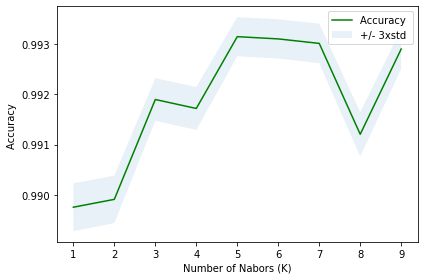

In [36]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [37]:
print( "The best accuracy", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy 0.993152677392647 with k= 5


In [38]:
k = 5
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [39]:
yhat = neigh.predict(X_test)
yhat[0:5]

array([1., 0., 1., 1., 1.])

In [40]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.9925579967968697
Test set Accuracy:  0.993152677392647


In [41]:
from sklearn.metrics import f1_score

print("DT F1-score: %.2f" % f1_score(y_test, yhat, average='weighted') )

DT F1-score: 0.99


<div id="decision_tree">
    <h2>Decision Tree</h2>
</div>


In [42]:
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
DT_model.fit(X_train,y_train)
DT_model

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [43]:
yhat = DT_model.predict(X_test)
yhat

array([1., 0., 1., ..., 2., 2., 0.])

In [44]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, yhat))

DecisionTrees's Accuracy:  0.9931750542639128


In [45]:
from sklearn.metrics import f1_score

print("DT F1-score: %.2f" % f1_score(y_test, yhat, average='weighted') )

DT F1-score: 0.99


<div id="logistic_regression">
    <h2>Logistic Regression</h2>
</div>


In [46]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C=0.01).fit(X_train,y_train)
LR_model

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [47]:
yhat = LR_model.predict(X_test)
yhat

array([1., 0., 1., ..., 2., 2., 0.])

In [48]:
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

LR_yhat = LR_model.predict(X_test)
LR_yhat_prob = LR_model.predict_proba(X_test)

print("LR F1-score: %.2f" % f1_score(y_test, LR_yhat, average='weighted'))
print("LR LogLoss: %.2f" % log_loss(y_test, LR_yhat_prob))

LR F1-score: 0.99
LR LogLoss: 0.07


/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/sklearn/linear_model/base.py:297: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


In [49]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, yhat))

DecisionTrees's Accuracy:  0.9883864038130189


<div id="results">
    <h2>Results and Evaluations</h2>
</div>


The final results of the model evaluations are summarized in the following table:

| ML Model            | F1-Score | Accuracy |
|---------------------|----------|----------|
| KNN                 |  0.99    |  0.993   | 
| Decision Tree       |  0.99    |  0.993   |
| Logistic Regression |  0.99    |  0.988   |

